In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [3]:
import os
import cv2
from PIL import Image

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
DATA_DIR = 'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/'
SIZE = 64
dataset = []
label = []

In [5]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [6]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [16]:
datagen = ImageDataGenerator(rescale=1/255.0,
                            shear_range = 0.2,
                            horizontal_flip = True,
                            zoom_range = 0.2,
                            validation_split=0.2)

train_data_generator = datagen.flow_from_directory(directory = 'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/',
                                                   target_size=(64,64),
                                                   class_mode = 'categorical',
                                                   batch_size=64,
                                                   subset='training'
                                                  )

Found 22048 images belonging to 2 classes.


In [18]:
validation_data_generator = datagen.flow_from_directory('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 5510 images belonging to 2 classes.


In [10]:
image_shape = [64,64]

In [12]:
network = Sequential()

network.add(Convolution2D(filters=16,kernel_size = (3,3),activation='relu',input_shape=image_shape+[3]))
network.add(MaxPooling2D(2,2))


network.add(Convolution2D(filters=32,kernel_size = (3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Convolution2D(filters=64,kernel_size = (3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Dropout(0.2))

network.add(Flatten())


network.add(Dense(200,activation = 'relu'))

network.add(Dropout(0.5))

network.add(Dense(2,activation = 'softmax'))

In [13]:
network.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
r = network.fit_generator(
  train_data_generator,
  validation_data=validation_data_generator,
  epochs=50,
  steps_per_epoch=len(train_data_generator),
  validation_steps=len(validation_data_generator)
)

C:\Users\User\AppData\Local\Temp\ipykernel_6840\1950320386.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = network.fit_generator(


Epoch 1/50
345/345 [==============================] - 299s 864ms/step - loss: 0.5377 - accuracy: 0.7127 - val_loss: 0.2632 - val_accuracy: 0.9205
Epoch 2/50
345/345 [==============================] - 119s 345ms/step - loss: 0.1838 - accuracy: 0.9417 - val_loss: 0.1749 - val_accuracy: 0.9407
Epoch 3/50
345/345 [==============================] - 156s 452ms/step - loss: 0.1576 - accuracy: 0.9507 - val_loss: 0.1683 - val_accuracy: 0.9419
Epoch 4/50
345/345 [==============================] - 126s 366ms/step - loss: 0.1476 - accuracy: 0.9537 - val_loss: 0.1629 - val_accuracy: 0.9443
Epoch 5/50
345/345 [==============================] - 120s 347ms/step - loss: 0.1403 - accuracy: 0.9555 - val_loss: 0.1619 - val_accuracy: 0.9423
Epoch 6/50
345/345 [==============================] - 120s 347ms/step - loss: 0.1376 - accuracy: 0.9565 - val_loss: 0.1556 - val_accuracy: 0.9448
Epoch 7/50
345/345 [==============================] - 163s 473ms/step - loss: 0.1330 - accuracy: 0.9582 - val_loss: 0.1643 -

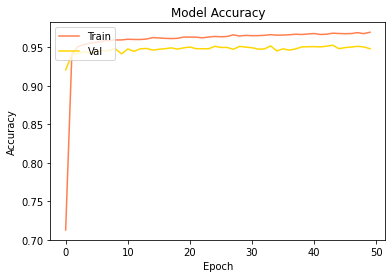

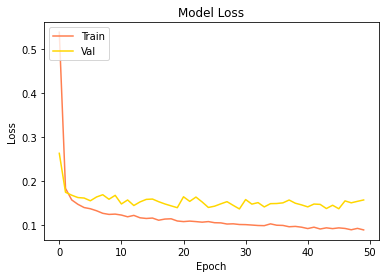

In [20]:
plt.plot(r.history['accuracy'],'coral')
plt.plot(r.history['val_accuracy'],'gold')
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(r.history['loss'],'coral')
plt.plot(r.history['val_loss'],'gold')
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [21]:
y_pred = network.predict(validation_data_generator)

87/87 [==============================] - 57s 647ms/step


In [ ]:
network.evaluate_generator

In [22]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)